<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana14/AjusteNolineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.optimize as spo
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
os.chdir("/content/drive/MyDrive/ColabNotebooks/Cursos/MetodosComputacionalesI2025/Semana14/Data/")
!ls

Exponencial.dat


In [52]:
data = pd.read_csv('Exponencial.dat',sep=' ')
data.columns = ['x','y']
x = np.array(data['x'])
y = np.array(data['y'])

sigma = np.random.normal(0,20,len(x))
sigma = np.abs(sigma)
sigma

array([28.79069757,  3.02970577, 12.87521579,  4.20187464, 23.22496757,
       26.76924189,  1.66506965,  5.55590783, 12.62864541,  7.86250475,
        6.83931768, 14.33887927,  4.96337704,  8.863959  , 19.62342496,
        0.99144567, 44.95514337, 11.8853161 , 22.98449312,  3.93238576,
       13.15140472,  5.7057561 , 26.92434783, 26.26207641, 23.46130248,
       15.53161334,  9.86895403,  2.19398167, 19.13338162])

Text(0, 0.5, 'y')

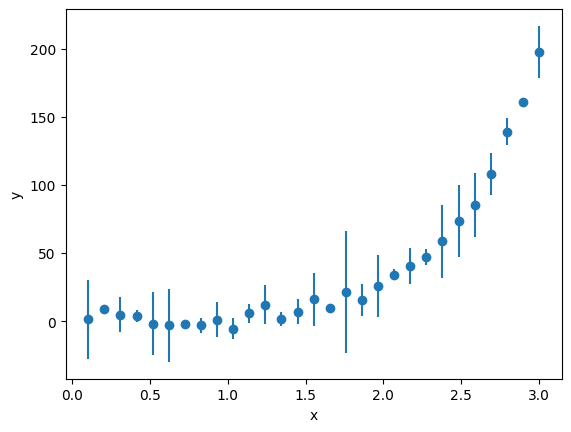

In [53]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [54]:
# Definimos el modelo
def GetModel1(x,p):
  y = p[0]*np.exp(p[1]*x)
  return y

In [55]:
def Chi2(p,x,y,sigma,Model):

  return np.sum( (y - Model(x,p))**2/(sigma**2)   )

In [56]:
nll = lambda *p: Chi2(*p)

In [58]:
p0 =np.array([0.,2.])

In [59]:
result = spo.minimize( nll, p0, args=(x,y,sigma,GetModel1) )
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 23.25893698449447
        x: [ 2.937e-01  2.178e+00]
      nit: 16
      jac: [-9.537e-07  1.192e-06]
 hess_inv: [[ 1.348e-03 -1.600e-03]
            [-1.600e-03  1.908e-03]]
     nfev: 87
     njev: 29

In [60]:
params = result.x
t = np.linspace(min(x),max(x),100)
params

array([0.29370829, 2.17781498])

Text(0, 0.5, 'y')

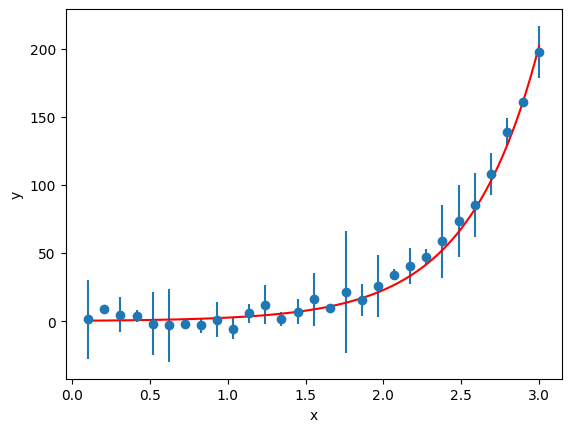

In [61]:
plt.errorbar(x,y,yerr=sigma,fmt='o')
plt.plot(t,GetModel1(t,params),color='r')
plt.xlabel('x')
plt.ylabel('y')